<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/07_Principal_Components_Analysis.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 07 Principal Components Analysis</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [ ]:
import rasterio
import numpy as np
from scikeo.pca import PCA
from scikeo.plot import plotRGB
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The images to be used can be downloaded [here](https://drive.google.com/drive/folders/1YBycQgyD3IkEW2-NqiHVAhNYETQNjLg5?usp=sharing):

In [ ]:
path_optical = "/content/drive/MyDrive/Packages/scikit-eo_data/06_pca/LC08_232066_20190727_SR.tif"
img = rasterio.open(path_optical)

Applying the ```PCA``` function:

In [ ]:
arr_pca = PCA(image = img, stand_varb = True)

## 3.0 Results

Dictionary of results:

In [ ]:
arr_pca.keys()

dict_keys(['PCA_image', 'Variance', 'Proportion_of_variance', 'Cumulative_variance', 'Correlation', 'Contributions_in_%'])

Proportion of variance:

In [ ]:
prop_var = arr_pca.get('Proportion_of_variance')
prop_var

array([0.71163637, 0.22591717, 0.05180512, 0.00633781, 0.00314488,
       0.00115866])

Cumulative of variance:

In [ ]:
cum_var = arr_pca.get('Cumulative_variance')*100
cum_var

array([ 71.16363687,  93.75535368,  98.93586616,  99.56964677,
        99.88413444, 100.        ])

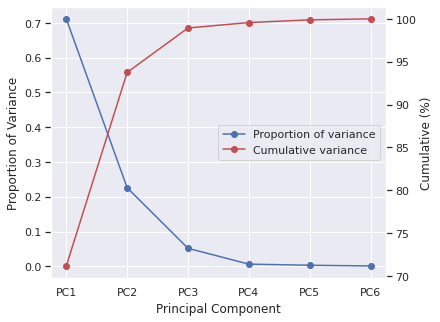

In [ ]:
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

fig, axes = plt.subplots(figsize = (6,5))
ln1 = axes.plot(x_labels, prop_var, marker ='o', markersize = 6,  label = 'Proportion of variance')

axes2 = axes.twinx()
ln2 = axes2.plot(x_labels, cum_var, marker = 'o', color = 'r', label = "Cumulative variance")

# lengend
ln = ln1 + ln2
labs = [l.get_label() for l in ln]

axes.legend(ln, labs, loc = 'center right')
axes.set_xlabel("Principal Component")
axes.set_ylabel("Proportion of Variance")
axes2.set_ylabel("Cumulative (%)")
axes2.grid(False)
plt.show()

Contributions of each variable in %:

In [ ]:
arr_pca.get('Contributions_in_%')

,pc1,pc2,pc3,pc4,pc5,pc6
var1,21.995978,1.960546,3.724337,50.805062,15.480724,6.033353
var2,20.967988,2.329565,22.033540,2.187366,1.346264,51.135278
var3,21.975657,2.175522,5.883641,28.085322,2.605869,39.273989
var4,2.953513,55.769964,37.723075,1.027153,0.886846,1.639449
var5,13.678114,26.991486,12.724067,10.324342,34.406918,1.875074
var6,18.428751,10.772917,17.911341,7.570756,45.273379,0.042856


Visualizing data result:

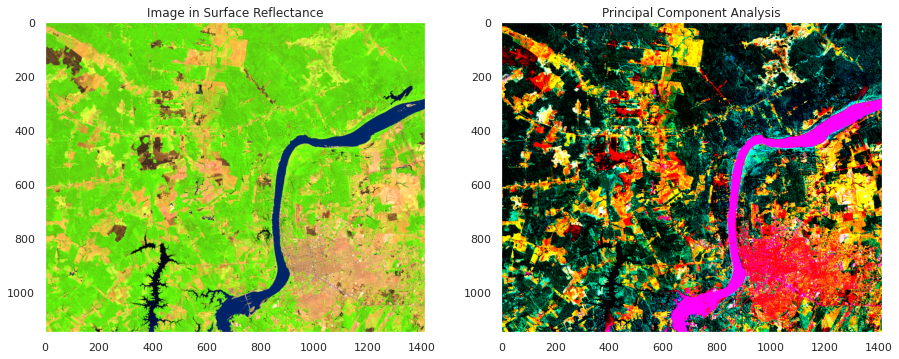

In [ ]:
img_pca = arr_pca.get('PCA_image')

# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# satellite image
plotRGB(img, bands = [5,4,3], title = 'Image in Surface Reflectance', ax = axes[0])
# class results
axes[1].imshow(img_pca[:,:,0:3])
axes[1].set_title("Principal Component Analysis")
axes[1].grid(False)